In [8]:
#This programm compare Fast Gradient Method and Method of Minimal Residual for N random linear system
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Residual
def half_grad(A, u, f):
	return  np.dot(A, u) - f

# Coefficient for Fast Gradient Method
def tau(A, u, f):
	r_k = half_grad(A, u, f)
	return np.dot(r_k, r_k)/np.dot(np.dot(A, r_k), r_k)

# Coefficient for Method of Minimal Residual
def tau_min(A, u, f):
	r_k = half_grad(A, u, f)
	Ar_k = np.dot(A, r_k)
	return np.dot(Ar_k, r_k)/np.dot(Ar_k, Ar_k)


N = 30
num_of_matrix = 50
size = 100

for i in range(num_of_matrix):
	#start vectors
	u_1 = np.zeros((size, ))
	u_2, u_3 = u_1, u_1

	A = np.random.uniform(-10, 10, (size, size))
	# Au = f => Bu = F, where B = AA^T is symmetric matrix, F = A^t f
	A = np.dot(A.transpose(), A)
	ans = np.random.uniform(-10, 10, (size, ))
	f = np.dot(A.transpose(), ans)
	
	st_1, st_2, st_3 = np.zeros((N + 1,)), np.zeros((N + 1,)), np.zeros((N + 1,))
	st_1[0], st_2[0], st_3[0] = np.linalg.norm(u_1 - ans, 2), np.linalg.norm(u_1 - ans, 2), np.linalg.norm(u_1 - ans, 2)
	dif_1, dif_2, dif_3 = np.zeros((N + 1,)), np.zeros((N + 1,)), np.zeros((N + 1,))
	dif_1[0], dif_2[0], dif_3[0] = np.linalg.norm(u_1 - ans, 2), np.linalg.norm(u_1 - ans, 2), np.linalg.norm(u_1 - ans, 2)

	num_of_iterations = 0
	while num_of_iterations < N:
		num_of_iterations += 1
		u_prev, u_1 = u_1, u_1 - tau(A, u_1, f) * half_grad(A, u_1, f)
		dif_1[num_of_iterations] += np.linalg.norm(u_1 - ans, 2)
		st_1[num_of_iterations] += np.linalg.norm(u_1 -u_prev, 2)
	
		u_prev, u_2 = u_2, u_2 - tau_min(A, u_2, f) * half_grad(A, u_2, f)
		dif_2[num_of_iterations] += np.linalg.norm(u_2 - ans, 2)
		st_2[num_of_iterations] += np.linalg.norm(u_2 -u_prev, 2)
	


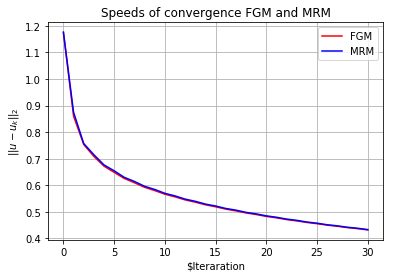

In [7]:
plt.plot(range(0, num_of_iterations + 1, 1), dif_1 / (num_of_matrix), 'r')
plt.plot(range(0, num_of_iterations + 1, 1), dif_2 / (num_of_matrix), 'b')
plt.ylabel(r'$||u - u_k||_2$')
plt.xlabel(r'$Iteraration')
plt.title(r"Speeds of convergence FGM and MRM")
plt.grid(True)
plt.legend(('FGM', 'MRM'))


Text(0.5,1,'Difference between speed of convergence FGM and MRM')

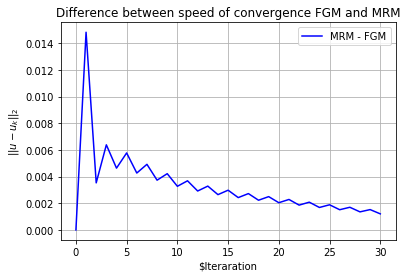

In [4]:
plt.plot(range(0, num_of_iterations + 1, 1), (dif_2 - dif_1) / (num_of_matrix), 'b')
plt.ylabel(r'$||u - u_k||_2$')
plt.xlabel(r'$Iteraration')
plt.legend(('MRM - FGM',))
plt.grid(True)
plt.title(r"Difference between speed of convergence FGM and MRM")

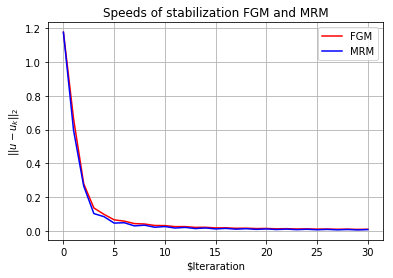

In [5]:
plt.plot(range(0, num_of_iterations + 1, 1), st_1 / (num_of_matrix), 'r')
plt.plot(range(0, num_of_iterations + 1, 1), st_2 / (num_of_matrix), 'b')
plt.ylabel(r'$||u - u_k||_2$')
plt.xlabel(r'$Iteraration')
plt.title(r"Speeds of stabilization FGM and MRM")
plt.grid(True)
plt.legend(('FGM', 'MRM'))

Text(0.5,1,'Difference between speed of stabilization FGM and MRM')

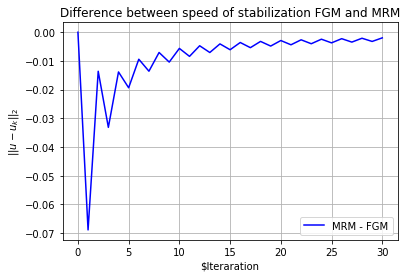

In [6]:
plt.plot(range(0, num_of_iterations + 1, 1), (st_2 - st_1) / (num_of_matrix), 'b')
plt.ylabel(r'$||u - u_k||_2$')
plt.xlabel(r'$Iteraration')
plt.legend(('MRM - FGM',))
plt.grid(True)
plt.title(r"Difference between speed of stabilization FGM and MRM")